In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 

In [2]:
wineDF = pd.read_csv('../data/winequality-white.csv', sep=';')
wineDF

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
wineDF.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [4]:
wineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# 상관관계 분석 결과 등급과 마땅히 상관계수가 높은 지표는 없다.
wineDF.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


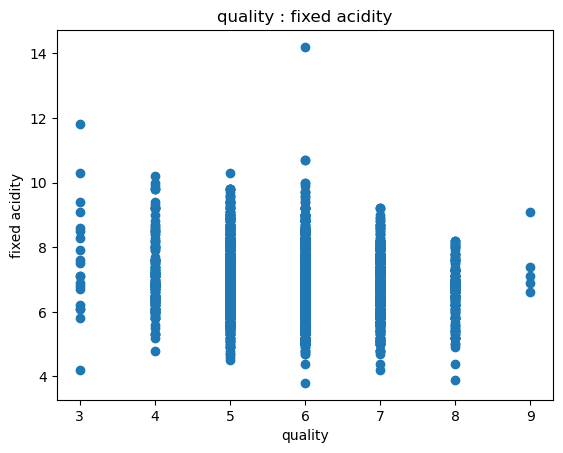

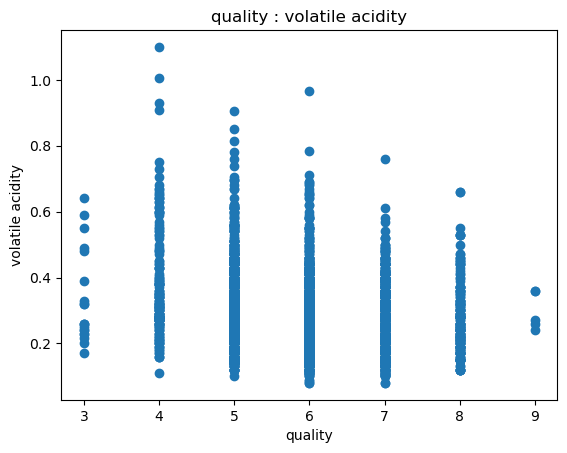

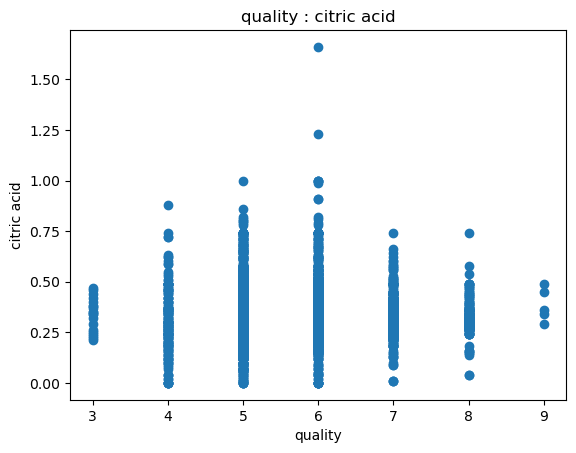

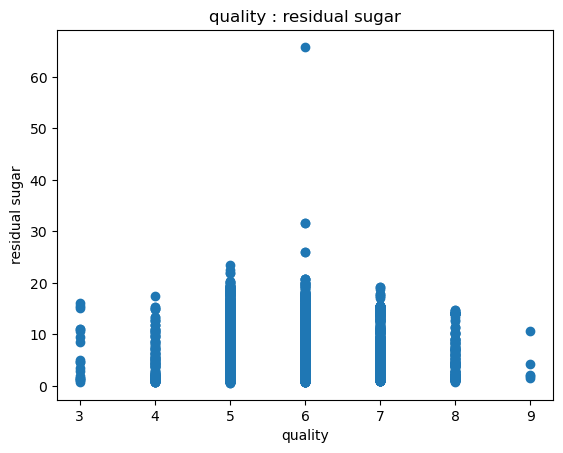

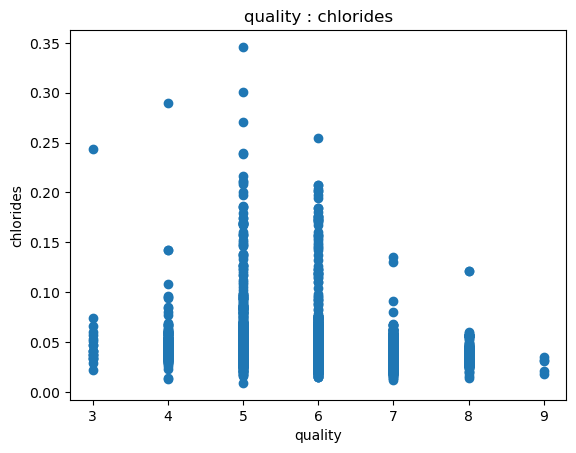

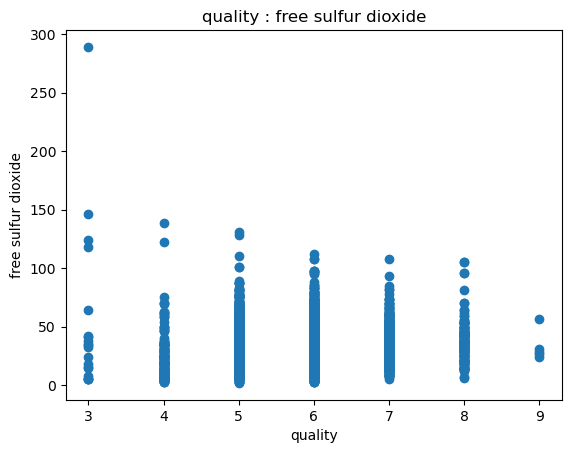

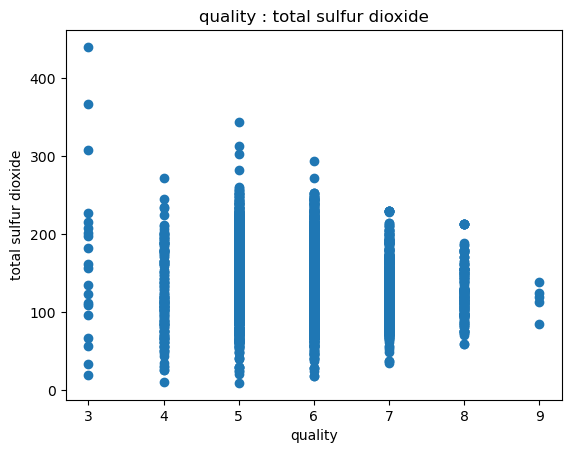

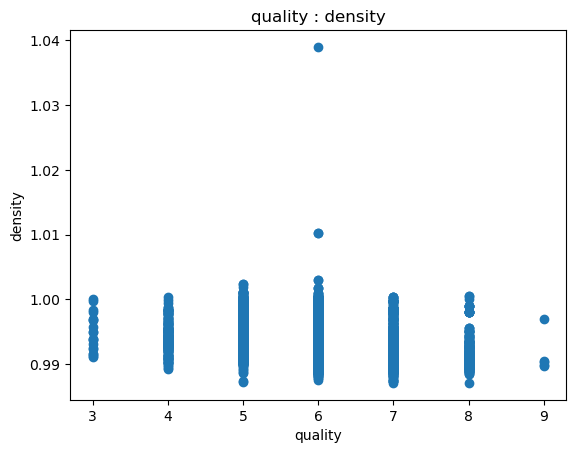

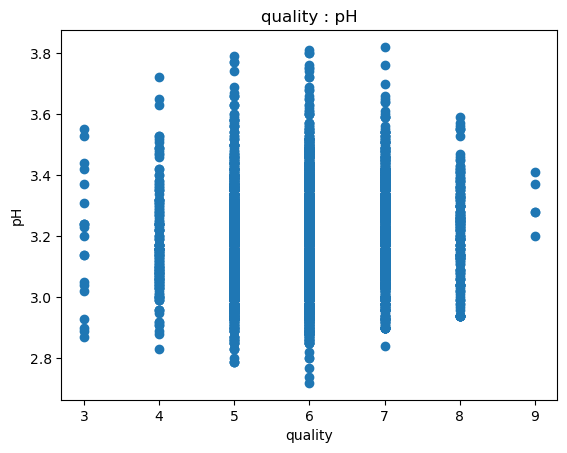

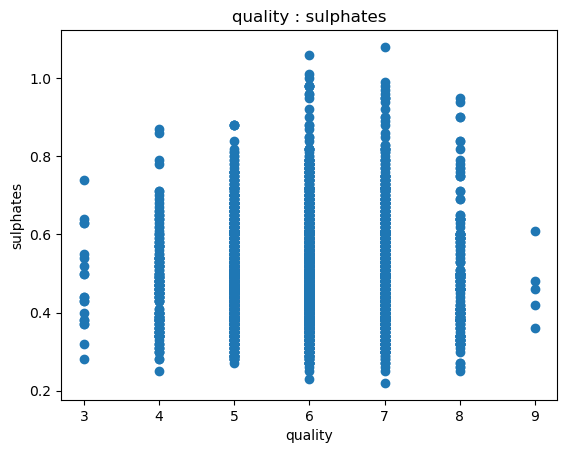

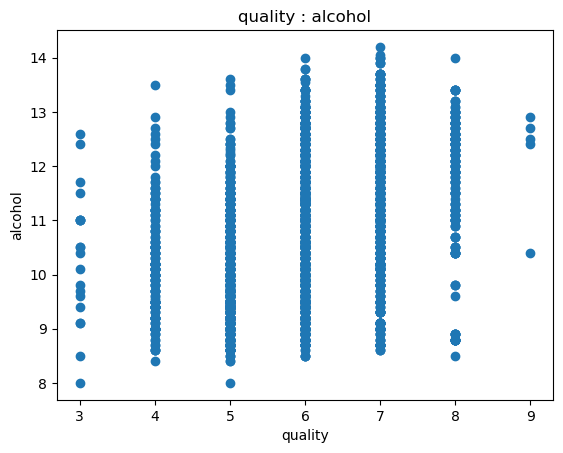

In [6]:
# 산점도를 그려봤을 때도 모든 등급에서 규칙성을 찾아볼 수 없다. => 한가지 요인 자체로는 등급 판별에 큰 영향이 없을 수도
# 개판이다.
for col in wineDF.columns[:-1]:
    plt.scatter(wineDF['quality'], wineDF[col])
    plt.title(f'quality : {col}')
    plt.xlabel('quality')
    plt.ylabel(col)
    plt.show()

## 모든 컬럼을 사용해서 모델 설계

In [7]:
allfeatureDF = wineDF[wineDF.columns[:-1]]
targetSR = wineDF['quality']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(allfeatureDF, targetSR,
                                                    test_size=0.2,
                                                    stratify=targetSR)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                    test_size=0.1,
                                                    stratify=Y_train)

In [9]:
model1 = KNeighborsClassifier()
model1.fit(X_train, Y_train)
model1.score(X_val, Y_val)

0.4413265306122449

In [10]:
len(Y_test), sum(model1.predict(X_test) == Y_test), model1.score(X_test, Y_test)

(980, 461, 0.4704081632653061)

## residual sugar, alcohol 컬럼만 사용

In [11]:
twofeatureDF = wineDF[['residual sugar', 'alcohol']]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(twofeatureDF, targetSR,
                                                    test_size=0.2,
                                                    stratify=targetSR)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                    test_size=0.1,
                                                    stratify=Y_train)

In [13]:
model2 = KNeighborsClassifier()
model2.fit(X_train, Y_train)
model2.score(X_val, Y_val)

0.45663265306122447

In [14]:
# 컬럼을 전부 사용했을 때보단 성능이 좋지만 여전히 점수가 높지 않음
len(Y_test), sum(model2.predict(X_test) == Y_test), model2.score(X_test, Y_test)

(980, 489, 0.4989795918367347)

In [15]:
# K값을 1부터 100까지일 때 성능 평가
train_score = []
test_score = []
for k in range(1, 101):
    modelK = KNeighborsClassifier(n_neighbors=k)
    modelK.fit(X_train, Y_train)
    train_score.append(modelK.score(X_val, Y_val))
    test_score.append(modelK.score(X_test, Y_test))

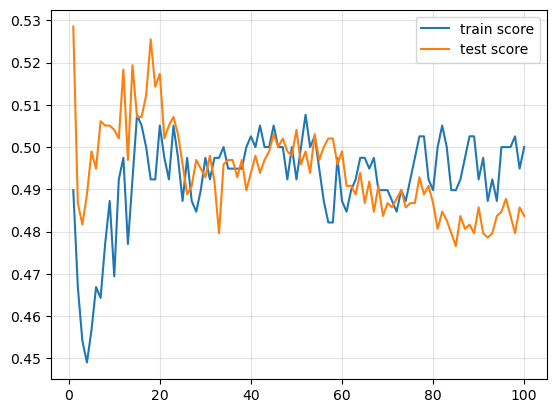

Highest test score : 0.5285714285714286 (K = 1)


In [16]:
# 성능이 실행할 때마다 편차가 큼. 평가 모호
plt.plot(range(1, 101), train_score, label='train score')
plt.plot(range(1, 101), test_score, label='test score')
plt.legend()
plt.grid(alpha=0.35)
plt.show()

print(f'Highest test score : {max(test_score)} (K = {test_score.index(max(test_score))+1})')

## residual sugar, alcohol, total sulfur dioxide 컬럼 사용

In [17]:
threefeatureDF = wineDF[['residual sugar', 'alcohol', 'total sulfur dioxide']]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(threefeatureDF, targetSR,
                                                    test_size=0.2,
                                                    stratify=targetSR)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                    test_size=0.1,
                                                    stratify=Y_train)

In [19]:
model3 = KNeighborsClassifier()
model3.fit(X_train, Y_train)
model3.score(X_val, Y_val)

0.4719387755102041

In [20]:
len(Y_test), sum(model3.predict(X_test) == Y_test), model3.score(X_test, Y_test)

(980, 489, 0.4989795918367347)

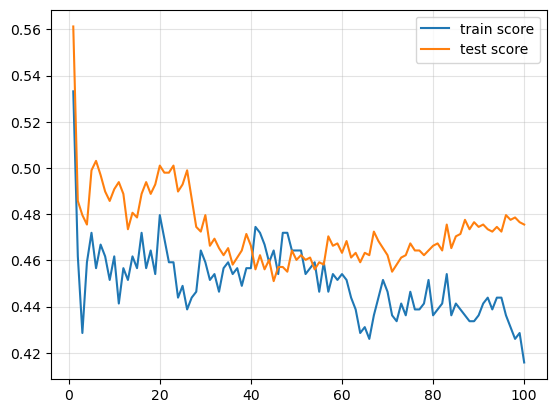

Highest test score : 0.5612244897959183 (K = 1)


In [21]:
# K값을 1부터 100까지일 때 성능 평가
train_score = []
test_score = []
for k in range(1, 101):
    modelK = KNeighborsClassifier(n_neighbors=k)
    modelK.fit(X_train, Y_train)
    train_score.append(modelK.score(X_val, Y_val))
    test_score.append(modelK.score(X_test, Y_test))
    
plt.plot(range(1, 101), train_score, label='train score')
plt.plot(range(1, 101), test_score, label='test score')
plt.legend()
plt.grid(alpha=0.35)
plt.show()

print(f'Highest test score : {max(test_score)} (K = {test_score.index(max(test_score))+1})')
# 더 좋아지는거 같기도 하고 아닌거 같기도 하고 오히려 구려지는거 같기도 하고 몇번을 실행해도 잘 모르겠다

In [22]:
# model3에서 train dataset, test dataset 크기를 바꾸어 시도
X_train, X_test, Y_train, Y_test = train_test_split(threefeatureDF, targetSR,
                                                    test_size=0.15,
                                                    stratify=targetSR)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                    test_size=0.1,
                                                    stratify=Y_train)

model3_1 = KNeighborsClassifier()
model3_1.fit(X_train, Y_train)
model3_1.score(X_val, Y_val)

0.5227817745803357

In [23]:
# 딱히 효과는 없는거 같다.
len(Y_test), sum(model3_1.predict(X_test) == Y_test), model3_1.score(X_test, Y_test)

(735, 364, 0.49523809523809526)

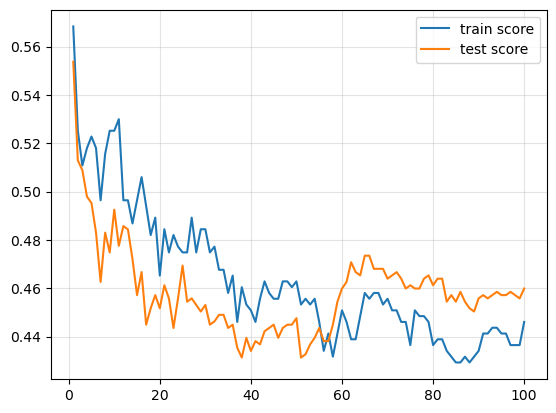

Highest test score : 0.5537414965986395 (K = 1)


In [24]:
# K값을 1부터 100까지일 때 성능 평가
train_score = []
test_score = []
for k in range(1, 101):
    modelK = KNeighborsClassifier(n_neighbors=k)
    modelK.fit(X_train, Y_train)
    train_score.append(modelK.score(X_val, Y_val))
    test_score.append(modelK.score(X_test, Y_test))

plt.plot(range(1, 101), train_score, label='train score')
plt.plot(range(1, 101), test_score, label='test score')
plt.legend()
plt.grid(alpha=0.35)
plt.show()

print(f'Highest test score : {max(test_score)} (K = {test_score.index(max(test_score)) + 1})')

In [25]:
# 그렇다면 model2에서 데이터셋 크기를 바꿔보자
X_train, X_test, Y_train, Y_test = train_test_split(twofeatureDF, targetSR,
                                                    test_size=0.15,
                                                    stratify=targetSR)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,
                                                    test_size=0.1,
                                                    stratify=Y_train)

model2_1 = KNeighborsClassifier()
model2_1.fit(X_train, Y_train)
model2_1.score(X_val, Y_val)

0.48201438848920863

In [26]:
# 역시 별 효과는 없는거 같다.
len(Y_test), sum(model2_1.predict(X_test) == Y_test), model2_1.score(X_test, Y_test)

(735, 364, 0.49523809523809526)

## 참고 : ChatGpt에게 와인 등급 기준을 물어봤을 때


와인의 등급은 여러 가지 요소에 기반하여 결정되며, 주로 와인의 품질과 특성을 나타냅니다. 다양한 국가와 지역에서는 다른 등급 시스템을 사용할 수 있지만, 일반적으로는 다음과 같은 기준이 사용됩니다.

- 포도 품종: 어떤 종류의 포도로 와인이 양조되었는지가 중요합니다. 특정 포도 품종은 특유의 향과 맛을 가지고 있어서 와인의 특징을 결정하는데 큰 영향을 미칩니다.

- 지역 (Terroir): 와인이 생산된 지역은 그 지역의 토양, 기후, 고도 등의 특성에 의해 영향을 받습니다. 이러한 지역적 특성을 "테르루아"라고 부르며, 와인 등급에 영향을 미칩니다.

- 양조 및 저장 방법: 어떻게 와인이 양조되었고, 어떻게 저장되었는지도 중요합니다. 고급 와인은 종종 오랜 시간 동안 특정 온도와 습도에서 숙성되거나 특별한 방법으로 양조됩니다.

- 등급 시스템: 다양한 국가와 지역에서는 고유한 와인 등급 시스템을 사용합니다. 일반적으로는 보다 높은 등급에 해당하는 와인은 더 높은 품질과 가치를 가지고 있습니다.

- 와인의 연령: 일부 와인은 오랜 기간 동안 숙성되어야 더 좋아지는 경향이 있습니다. 따라서 와인의 연령도 등급을 결정하는 중요한 요소 중 하나입니다.

유명한 와인 등급 시스템으로는 프랑스의 AOC (Appellation d'Origine Contrôlée), 이탈리아의 DOCG (Denominazione di Origine Controllata e Garantita), 스페인의 DO (Denominación de Origen) 등이 있습니다. 이러한 등급 시스템은 와인 생산자와 소비자에게 와인의 품질과 기원을 신뢰할 수 있게 제시합니다.

결론 : 아무리 생각해도 얘네 등급 나눌 때 화학적인 요인은 안따지는거 같다. 그래서 그런데 이 데이터셋으로 모델을 만들기 보단 다른 데이터셋이 필요할거 같다.